# Esercitazione 3

Nella cartella sono presenti:
- I file *.cpp*, *.h*, *.x* del codice in C++.
- Un file di *input* ed uno di *output* per il codice in C++.
- Un `makefile`.
- I file di *input* della libreria __random__. 

<img src="Menu.png">

Prima di fare compilare il codice bisogna includere le librerie tramite il codice `setup.sh`, con il seguente codice:
```bash
cd .. #Vado nella cartella con setup.sh
source setup.sh
```

Includo le librerie necessarie per fare funzionare il notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Opzioni Piano Vanilla

Prendiamo in considerazioni le *opzioni di mercato europee*, esse consistono in contratti con le seduenti caratteristiche:
- __Writer__: colui che stipula il contratto e vende l'opzione.
- __Holder__: colui che compra l'opzione.
- Il __diritto__ dell'*holder* a comprare (*call option*) o vendere(*put option*) un bene/servizio (con un prezzo istantaneo $S(t)$) dal *writer* che è __obbligato__ a rispettare i termini.
- Un __prezzo prestabilito__ $K$ a cui deve avvenire una transizione.
- La __data di scadenza__ dell'opzione alla quale avviene la transizione.

L'*holder* eserciterà il suo diritto se il prezzo prestabilito risulta essere più conveniente di quello sul mercato.  Quindi nei due casi il profitto sarà:
- __Call option__: $\max[0,S(T)-K]$ .
- __Put option__: $\max[0,K-S(T)]$ .

Queste quantità devono essere scontate di $e^{-r\,T}$ per gli interessi che una banca garantisce con un deposito a $t=0$.

I prezzi delle opzioni sono il valore del profitto effettivo aspettato, quindi il profitto scontato medio.

<font color=red>Black e Sholes</font> hanno dato una soluzione analitica dei prezzi di queste operazioni con un tasso d'interesse *risk-free* $r$ costante ed una volatilità $\sigma^2$:
- __Call-option__ :
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- __Put-option__ :
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

dove $d_2 = d_1 - \sigma\sqrt{T-t}$, e dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
è la cumulativa della gaussiana $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
e dove
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

In questa esercitazione vedremo se i valori di queste previsioni sono compatibili con quelli ottenuti con due diversi metodi:
1. Campionando direttamente il prezzo finale del bene $S(T)$, da una $GBM\left(r,\sigma^2\right)$.
    $$
    S(t) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]
    $$
    dove $W(t)\sim\mathcal{N}(0,t)$.
2. Campionando il cammino discreto $GBM(r,\sigma^2)$ del prezzo $S(t)$ dividendo $[0,T]$ in $100$ intervalli.
    $$
    S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]
    $$
    con $Z_i \sim \mathcal{N}(0,1)$

Con i valori di input:
- prezzo del bene a $t=0$: $S(0)=100$
- scadenza: $T=1$
- prezzo prestabilito: $K=100$
- taso d'interesse risk-free: $r=0.1$
- volatilità: $\sigma=0.25$

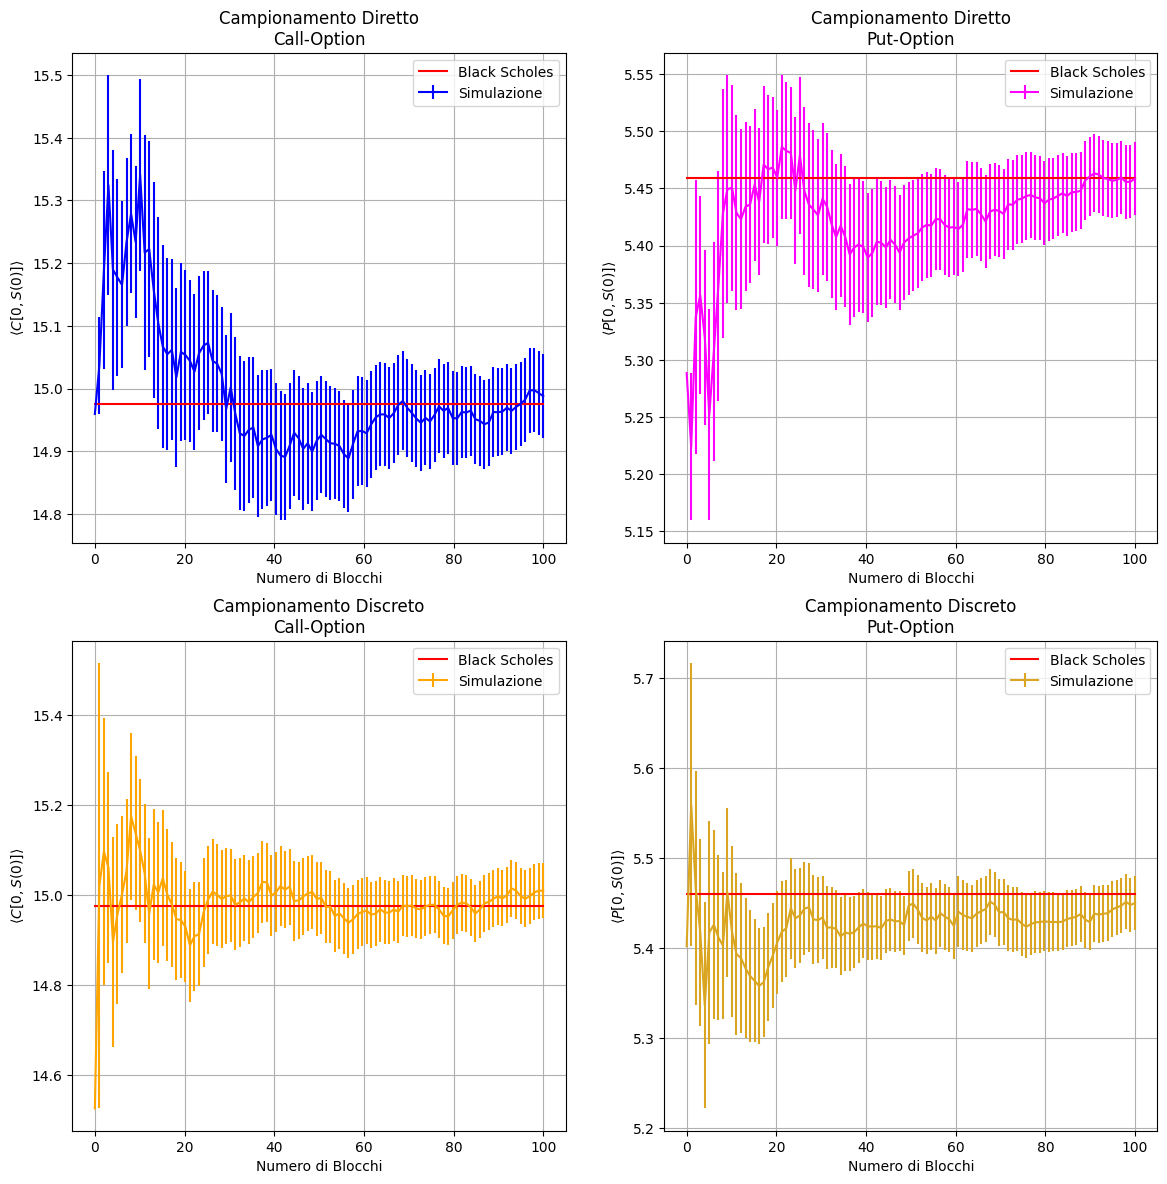

In [27]:
#Carico i dati da file
data=np.loadtxt("Black-Scholes.dat")

#Inizializzo vaiabili utili
E=np.array([
    14.975790778311286,
    5.4595325819072364
])
dim=np.shape(data)[0]
x=np.linspace(0,dim,dim)
m_color=[
    "blue",
    "magenta",
    "orange",
    "goldenrod"
]
option=[
    "Call",
    "Put"
]
yaxes=[
    r"$\langle C[0,S(0)]\rangle$",
    r"$\langle P[0,S(0)]\rangle$"
]
simulation=[
    f"Campionamento Diretto\n",
    f"Campionamento Discreto\n"
]

#Faccio i grafici
fig, ax= plt.subplots(2,2, figsize=(14,14))
ax=np.reshape(ax,4)

for i in range(np.shape(ax)[0]):
    ax[i].errorbar(x, data[:,i], yerr= data[:,i+4],label="Simulazione",color=m_color[i])
    ax[i].plot(x,np.ones(dim)*E[i%2],color="red",label="Black Scholes")

    #Parte grafica
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_title(simulation[i//2]+option[i%2]+"-Option")
    ax[i].set_xlabel("Numero di Blocchi")
    ax[i].set_ylabel(yaxes[i%2])

Si osseva che in ogni caso le simulazioni hanno risultati consistenti con i valori analitici ottenuti da Black e Scholes.